In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [3]:
 pip install kaggle

In [4]:
 mkdir ~/.kaggle

In [5]:
 cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d sharansmenon/animals141

 94% 57.0M/60.5M [00:02<00:00, 42.5MB/s]
100% 60.5M/60.5M [00:02<00:00, 27.5MB/s]


In [8]:
! unzip /content/animals141.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/dataset/ceratitis-capitata/ceratitis-capitata_92_1364760f.jpg  
  inflating: dataset/dataset/ceratitis-capitata/ceratitis-capitata_93_df914c32.jpg  
  inflating: dataset/dataset/ceratitis-capitata/ceratitis-capitata_94_fd5647fe.jpg  
  inflating: dataset/dataset/ceratitis-capitata/ceratitis-capitata_96_b1b70c45.jpg  
  inflating: dataset/dataset/ceratitis-capitata/ceratitis-capitata_97_b7c264e5.jpg  
  inflating: dataset/dataset/ceratotherium-simum/ceratotherium-simum_18_4fcf8ad3.jpg  
  inflating: dataset/dataset/ceratotherium-simum/ceratotherium-simum_18_7565c9eb.jpg  
  inflating: dataset/dataset/ceratotherium-simum/ceratotherium-simum_19_8b607f2d.jpg  
  inflating: dataset/dataset/ceratotherium-simum/ceratotherium-simum_19_ced6ec21.jpg  
  inflating: dataset/dataset/ceratotherium-simum/ceratotherium-simum_27_44d0cb97.jpg  
  inflating: dataset/dataset/ceratotherium-simum/ceratotherium-simum_40_a33981f4.jpg  
  

In [9]:
train_data=tf.keras.utils.image_dataset_from_directory('/content/dataset/dataset',label_mode="categorical",batch_size=32,image_size=(256,256))

Found 6270 files belonging to 151 classes.


In [10]:
train_data = tf.keras.utils.image_dataset_from_directory(
  '/content/dataset/dataset',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(255,255),
  batch_size=32)

Found 6270 files belonging to 151 classes.
Using 5016 files for training.


In [11]:
test_data = tf.keras.utils.image_dataset_from_directory(
  '/content/dataset/dataset',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(255,255),
  batch_size=32)

Found 6270 files belonging to 151 classes.
Using 1254 files for validation.


In [12]:
for img,lab in train_data.take(1):
  print(img.shape)
  print(lab.shape)
  #print(img)
  print(lab)

(32, 255, 255, 3)
(32,)
tf.Tensor(
[118  69  97  62  36  14  89  54  92  29 125  53  23  31  39  14 105 136
  12   8 126 118 127  51  18   8  17 145 101  72  43  59], shape=(32,), dtype=int32)


In [13]:
class_names=train_data.class_names

In [14]:
class_names

['acinonyx-jubatus',
 'aethia-cristatella',
 'agalychnis-callidryas',
 'agkistrodon-contortrix',
 'ailuropoda-melanoleuca',
 'ailurus-fulgens',
 'alces-alces',
 'anas-platyrhynchos',
 'ankylosaurus-magniventris',
 'apis-mellifera',
 'aptenodytes-forsteri',
 'aquila-chrysaetos',
 'ara-macao',
 'architeuthis-dux',
 'ardea-herodias',
 'balaenoptera-musculus',
 'betta-splendens',
 'bison-bison',
 'bos-gaurus',
 'bos-taurus',
 'bradypus-variegatus',
 'branta-canadensis',
 'canis-lupus',
 'canis-lupus-familiaris',
 'carcharodon-carcharias',
 'cardinalis-cardinalis',
 'cathartes-aura',
 'centrochelys-sulcata',
 'centruroides-vittatus',
 'ceratitis-capitata',
 'ceratotherium-simum',
 'chelonia-mydas',
 'chrysemys-picta',
 'circus-hudsonius',
 'codium-fragile',
 'coelacanthiformes',
 'colaptes-auratus',
 'connochaetes-gnou',
 'correlophus-ciliatus',
 'crocodylus-niloticus',
 'crotalus-atrox',
 'crotophaga-sulcirostris',
 'cryptoprocta-ferox',
 'cyanocitta-cristata',
 'danaus-plexippus',
 'dasyp

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_data= train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)

normalizatiom

In [16]:
normalization_layer = layers.Rescaling(1./255)

In [17]:
normalized_ds = train_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.037706714 0.9997819


In [18]:
from tensorflow.keras.models import Sequential
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(255, 255, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 255, 255, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 255, 255, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        1

In [21]:
epochs=10
history = model.fit(
  train_data,
  validation_data=test_data,
  epochs=epochs
)

Epoch 1/10
157/157 [==============================] - 20s 52ms/step - loss: 5.0191 - accuracy: 0.0108 - val_loss: 4.8874 - val_accuracy: 0.0271
Epoch 2/10
157/157 [==============================] - 6s 39ms/step - loss: 4.7436 - accuracy: 0.0469 - val_loss: 4.5834 - val_accuracy: 0.0542
Epoch 3/10
157/157 [==============================] - 6s 38ms/step - loss: 3.9758 - accuracy: 0.1445 - val_loss: 4.2960 - val_accuracy: 0.1037
Epoch 4/10
157/157 [==============================] - 6s 39ms/step - loss: 2.3799 - accuracy: 0.4490 - val_loss: 4.9393 - val_accuracy: 0.1196
Epoch 5/10
157/157 [==============================] - 6s 39ms/step - loss: 0.8729 - accuracy: 0.7841 - val_loss: 7.0012 - val_accuracy: 0.1108
Epoch 6/10
157/157 [==============================] - 6s 39ms/step - loss: 0.3445 - accuracy: 0.9254 - val_loss: 8.3488 - val_accuracy: 0.1124
Epoch 7/10
157/157 [==============================] - 6s 39ms/step - loss: 0.1928 - accuracy: 0.9625 - val_loss: 9.2993 - val_accuracy: 0.095

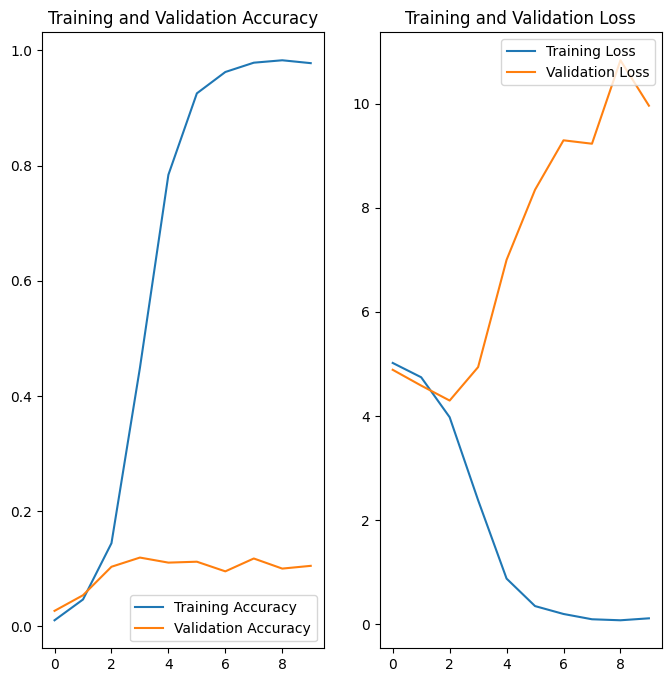

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

we will use dropout method to control overfit

In [23]:
model1 = Sequential([
  layers.Rescaling(1./255, input_shape=(255, 255, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.6),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [24]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 255, 255, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 255, 255, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 127, 127, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 63, 63, 64)       

In [26]:
epochs = 15
history = model1.fit(
  train_data,
  validation_data=test_data,
  epochs=epochs
)

Epoch 1/15
157/157 [==============================] - 7s 45ms/step - loss: 0.0910 - accuracy: 0.9827 - val_loss: 10.1937 - val_accuracy: 0.1116
Epoch 2/15
157/157 [==============================] - 6s 39ms/step - loss: 0.0368 - accuracy: 0.9924 - val_loss: 11.1764 - val_accuracy: 0.1164
Epoch 3/15
157/157 [==============================] - 6s 39ms/step - loss: 0.0590 - accuracy: 0.9882 - val_loss: 10.9936 - val_accuracy: 0.1029
Epoch 4/15
157/157 [==============================] - 6s 40ms/step - loss: 0.0392 - accuracy: 0.9938 - val_loss: 11.9274 - val_accuracy: 0.1108
Epoch 5/15
157/157 [==============================] - 6s 39ms/step - loss: 0.0192 - accuracy: 0.9962 - val_loss: 12.9554 - val_accuracy: 0.0941
Epoch 6/15
157/157 [==============================] - 6s 39ms/step - loss: 0.0051 - accuracy: 0.9990 - val_loss: 12.9967 - val_accuracy: 0.1045
Epoch 7/15
157/157 [==============================] - 6s 40ms/step - loss: 0.0060 - accuracy: 0.9994 - val_loss: 12.9663 - val_accuracy:

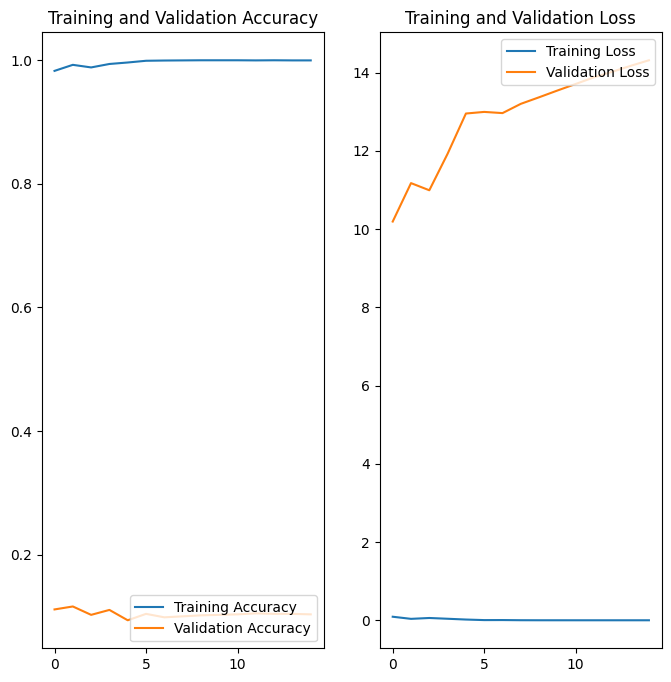

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Data augmentation

In [28]:
from tensorflow import keras
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(255,255,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


In [29]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.6),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 255, 255, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 255, 255, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 255, 255, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 127, 127, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                 

In [32]:
epochs = 15
history = model.fit(
  train_data,
  validation_data=test_data,
  epochs=epochs
)

Epoch 1/15
157/157 [==============================] - 13s 60ms/step - loss: 5.0026 - accuracy: 0.0104 - val_loss: 4.8776 - val_accuracy: 0.0199
Epoch 2/15
157/157 [==============================] - 9s 59ms/step - loss: 4.6696 - accuracy: 0.0347 - val_loss: 4.4845 - val_accuracy: 0.0550
Epoch 3/15
157/157 [==============================] - 9s 58ms/step - loss: 4.3224 - accuracy: 0.0644 - val_loss: 4.1822 - val_accuracy: 0.0901
Epoch 4/15
157/157 [==============================] - 9s 58ms/step - loss: 4.0480 - accuracy: 0.1037 - val_loss: 4.1309 - val_accuracy: 0.1045
Epoch 5/15
157/157 [==============================] - 9s 58ms/step - loss: 3.8213 - accuracy: 0.1316 - val_loss: 3.9557 - val_accuracy: 0.1236
Epoch 6/15
157/157 [==============================] - 9s 60ms/step - loss: 3.6275 - accuracy: 0.1673 - val_loss: 3.7982 - val_accuracy: 0.1611
Epoch 7/15
157/157 [==============================] - 9s 59ms/step - loss: 3.4342 - accuracy: 0.1978 - val_loss: 3.7366 - val_accuracy: 0.175

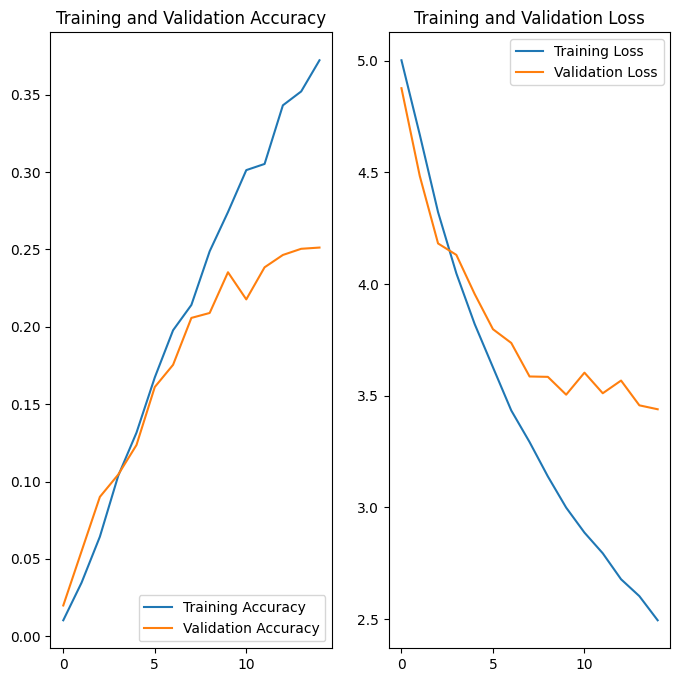

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()